In [1]:
import pandas as pd
from helpermodules import memory_handling as mh
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from functions import compute_sentiment, filtering_df, retrieve_datas, scraping_speeches, update_realtime, analysis
from functions.update_realtime import change_time
from functions.filtering_df import main as filtering
from functions.analysis import main as plot
from functions.scraping_speeches import main as scraping

#######
'''questa prima parte del codice presenta il codice che dovrebbe essere implementato 
(quello preceduto da '#') e in seguito il codice che ho utlizzato io non avendo ancora 
accesso alle funzioni, riciclando i file csv e 'pulendoli' per la task.
Le funzioni che verranno implementate devono restituire un oggetto che abbia 
la stessa forma e caratteristiche dell'oggetto finale (evidenziato nel codice)'''

yearlist = [2020,2021,2022,2023,2024]
# df_fed = scraping(yearlist) -> ALREADY RUN, STORE IN ANOTHER FILE
file = "2020-2024fedspeeches.pkl"
helper = mh.PickleHelper.pickle_load(file)
df_fed = helper.obj
df_fed['speaker'] = df_fed['speaker'].str.replace('Speech - ', '', regex=False)
df_fed['speaker'] = df_fed['speaker'].str.replace('Discussion - ', '', regex=False)


#df_prices = retrieve_datas(df_speech, deltabefore, deltaafter) -> ALREADY RUN
file2 = "2020-2024prices.pkl"
helper = mh.PickleHelper.pickle_load(file2)
df = helper.obj
print(df.columns) 
df['date'] = df['datetime'].dt.date
df_prices = df



#df_speech = computespeech()
file3 = "2020-2024speeches.pkl"
helper = mh.PickleHelper.pickle_load(file3)
df_speech = helper.obj
df_speech = df_speech[df_speech['date']>='2020-01-01']
df_speech = df_speech.sort_values(['date','timestamp'], ascending=True) #<--- OGGETTO FINALE


#df_sentiment = compute_sentiment()
file4 = "2020-2024sentiment.pkl"
helper = mh.PickleHelper.pickle_load(file4)
df_sentiment = helper.obj 


############

df_fed.rename(columns={'timestamp': 'opening_time'}, inplace=True)
#update the correct timestamp for df_speech
df_speech_final = change_time(df_speech, df_fed) #drop rate 16% e 58
#sorting the values
df_speech_final = df_speech_final.sort_values(['date','timestamp'], ascending=True)



# Define market open and close times (in ET)
market_open = pd.to_datetime('09:30:00', format='%H:%M:%S').time()
market_close = pd.to_datetime('16:00:00', format='%H:%M:%S').time()

# Extract time from 'timestamp'
df_speech_final['time'] = df_speech_final['timestamp'].dt.time

# Filter rows where 'time' is within market hours
beforefilteringvalues = len(df_speech_final.text.unique())
df_filtered = df_speech_final[(df_speech_final['time'] >= market_open) & (df_speech_final['time'] < market_close)]
afterfilteringvalues = len(df_filtered.text.unique())
print('When filtering out datas out of market time the drop ratio is ',(afterfilteringvalues/beforefilteringvalues)*100,'%\nWe have dropped ',beforefilteringvalues-afterfilteringvalues,'values') # 65% e 100 valori
df_speech_final = df_filtered.drop(columns=['time'])



df_speech=df_speech_final

Index(['datetime', 'close', 'volume'], dtype='object')
When comparing df_speech with df_fed the drop ratio is 16.15598885793872 % 
We have dropped  58 values
When filtering out datas out of market time the drop ratio is  66.44518272425249 %
We have dropped  101 values


the number of elements less than 5 mins long are 19
No price data found for speech: Strengthening the Community Reinvestment Act by Staying True to Its Core Purpose by Governor Lael Brainard on 2020-01-08 00:00:00
No price data found for speech: The Outlook for Housing by Governor Michelle W. Bowman on 2020-01-16 00:00:00
No price data found for speech: Financial Markets and Monetary Policy: Is There a Hall of Mirrors Problem? by Vice Chair Richard H. Clarida on 2020-02-21 00:00:00
No price data found for speech: Monetary Policy Strategies and Tools When Inflation and Interest Rates Are Low by Governor Lael Brainard on 2020-02-21 00:00:00
No price data found for speech: U.S. Economic Outlook and Monetary Policy by Vice Chair Richard H. Clarida on 2020-02-25 00:00:00
No price data found for speech: New Economic Challenges and the Fed's Monetary Policy Review by Chair Jerome H. Powell on 2020-08-27 00:00:00
No price data found for speech: Remarks at the Hoover Institution by Vice Chair f

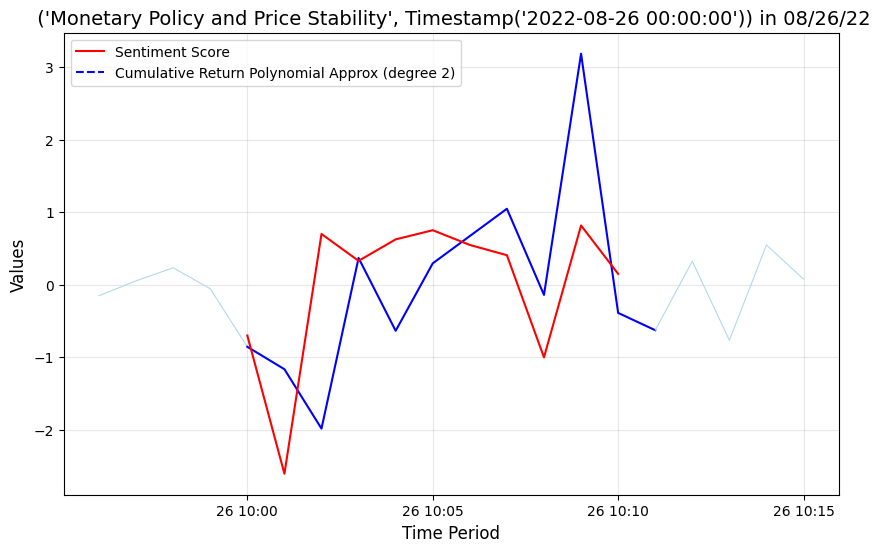

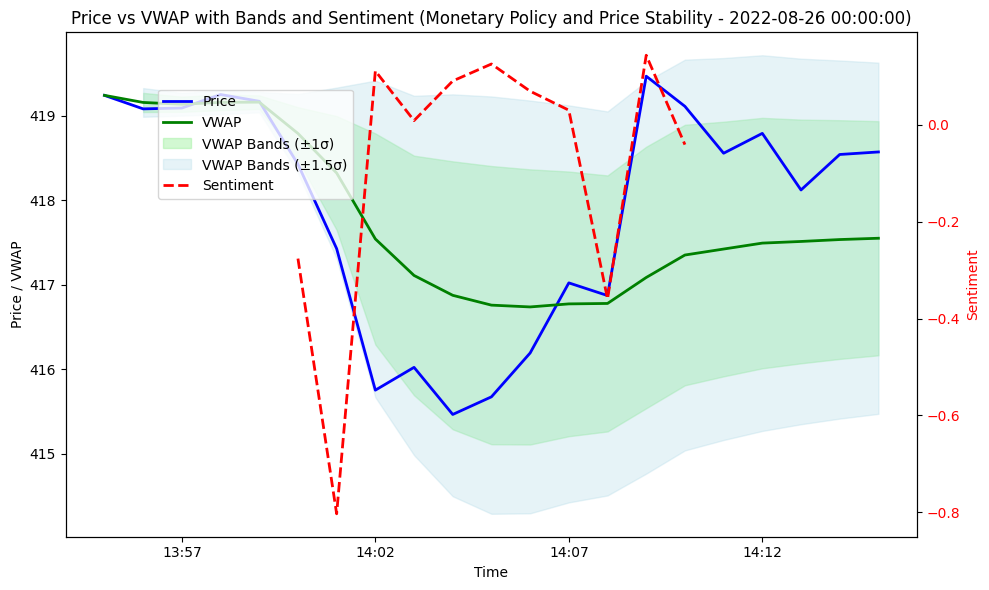

Thank you for t 





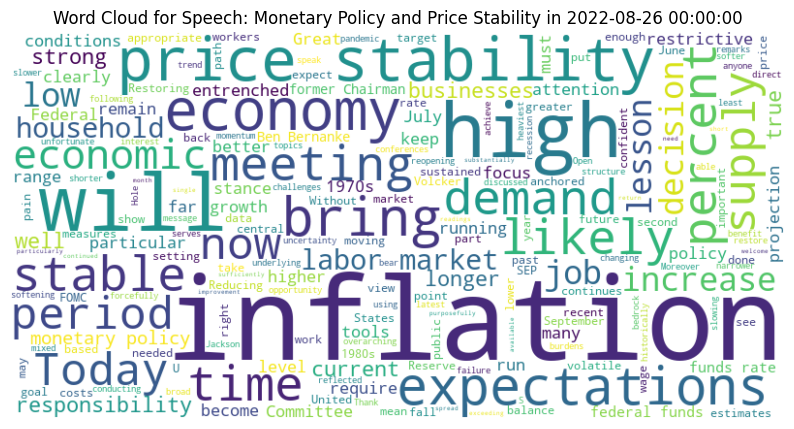

In [2]:
#combining together all the values to have a final dataframe including datas for 
#speech, sentiment, pct_change
#select a timedelta to also show prior and successive pct_change values 
deltabefore = 5
deltaafter = 4
df_speech_final, df_prices_final = filtering(df_prices, df_speech, df_sentiment,deltabefore, deltaafter) # dropped 51 values 

#plot the best top_n values for volatility over the speech time 
plot(df_speech_final, deltabefore, deltaafter, top_n=1)


In [3]:
df_speech_final

,date,speaker,title,link,text,timestamp,text_by_minute,finbert_score,pct_change,volume,close
0,2021-01-13,NaN,Full Employment in the New Monetary Policy Fr...,NaN,NaN,2021-01-13 12:55:00-05:00,NaN,NaN,NaN,58152,380.29001
1,2021-01-13,NaN,Full Employment in the New Monetary Policy Fr...,NaN,NaN,2021-01-13 12:56:00-05:00,NaN,NaN,-0.000099,34619,380.25229
2,2021-01-13,NaN,Full Employment in the New Monetary Policy Fr...,NaN,NaN,2021-01-13 12:57:00-05:00,NaN,NaN,-0.000269,82552,380.14999
3,2021-01-13,NaN,Full Employment in the New Monetary Policy Fr...,NaN,NaN,2021-01-13 12:58:00-05:00,NaN,NaN,-0.000118,54081,380.10501
4,2021-01-13,NaN,Full Employment in the New Monetary Policy Fr...,NaN,NaN,2021-01-13 12:59:00-05:00,NaN,NaN,0.000014,28532,380.11020
...,...,...,...,...,...,...,...,...,...,...,...
4221,2022-12-01,NaN,Why Bank Capital Matters,NaN,NaN,2022-12-01 15:27:00-05:00,NaN,NaN,0.000344,101205,407.41000
4222,2022-12-01,NaN,Why Bank Capital Matters,NaN,NaN,2022-12-01 15:28:00-05:00,NaN,NaN,0.000000,149039,407.41000
4223,2022-12-01,NaN,Why Bank Capital Matters,NaN,NaN,2022-12-01 15:29:00-05:00,NaN,NaN,-0.000123,63459,407.35999
4224,2022-12-01,NaN,Why Bank Capital Matters,NaN,NaN,2022-12-01 15:30:00-05:00,NaN,NaN,0.000417,105107,407.53000


------------------

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

def scale_data_minmax(sp500_data, sentiment_data):
    scaler = MinMaxScaler(feature_range=(-1, 1))  # Scale between 0 and 1
    
    # Reshaping the data to be 2D (required for the scaler)
    sp500_data_scaled = scaler.fit_transform(sp500_data.reshape(-1, 1))
    sentiment_data_scaled = scaler.fit_transform(sentiment_data.reshape(-1, 1))
    
    return sp500_data_scaled.flatten(), sentiment_data_scaled.flatten()

In [7]:
from sklearn.preprocessing import StandardScaler
def scale_data_zscore (sp500_data, sentiment_data):
    scaler = StandardScaler()
    sp500_data_scaled = scaler.fit_transform(sp500_data)
    sentiment_data_scaled = scaler.fit_transform(sentiment_data)
    return sentiment_data_scaled , sp500_data_scaled


In [11]:
def find_best_volatility(top_n, df_speech):
    # Drop rows with missing values
    df = df_speech.dropna()
    
    # Create a dictionary to store volatilities and indices
    volatility_dict = {}
    index_dict = {}  # To store indices for each link
    
    # Get the unique list of links
    linklist = df['link'].unique().tolist()
    
    # Calculate the volatility for each link and track indices
    for link in linklist:
        # Calculate volatility
        volatility = df[df['link'] == link]['pct_change'].std()
        volatility_dict[link] = volatility
        
        # Track indices for the link
        indices = df[df['link'] == link].index.tolist()
        if len(indices) > 0:
            indices.append(indices[-1] + 1)  # Append the next index (for t+1)
        index_dict[link] = indices  # Store indices for the link
    
    # Convert the volatility dictionary to a DataFrame
    store_df = pd.DataFrame.from_dict(volatility_dict, orient='index', columns=['volatility'])
    
    # Sort by volatility in descending order
    store_df = store_df.sort_values(by='volatility', ascending=False)
    
    # Select the top N links with the highest volatility
    top_links = store_df.head(top_n).index.tolist()  # Get the top N links
    
    # Collect all indices associated with the top N links
    filtered_indices = []
    for link in top_links:
        filtered_indices.extend(index_dict[link])  # Add the indices of the link
    
    # Filter the original DataFrame by the collected indices
    filtered_df = df_speech.loc[filtered_indices]  # Use `.loc` for index filtering
    
    return filtered_df


In [ ]:
#let's isolate the highest volatility speeches 
df_volatility=find_best_volatility(5,df_speech_final)

# 2020
df2020 = df_speech_final[(df_speech_final['date'] >= '2020-01-01') & (df_speech_final['date'] <= '2020-12-31')]

# 2021
df2021 = df_speech_final[(df_speech_final['date'] >= '2021-01-01') & (df_speech_final['date'] <= '2021-12-31')]

# 2022
df2022 = df_speech_final[(df_speech_final['date'] >= '2022-01-01') & (df_speech_final['date'] <= '2022-12-31')]

# 2023
df2023 = df_speech_final[(df_speech_final['date'] >= '2023-01-01') & (df_speech_final['date'] <= '2023-12-31')]

# 2024
df2024 = df_speech_final[(df_speech_final['date'] >= '2024-01-01') & (df_speech_final['date'] <= '2024-12-31')]

-0.00107624204948678 0.016795784554331783
Error processing link /newsevents/speech/clarida20210414a.htm: '[3182] not in index'
0.005450105973236774 -0.008044516406133644
-0.017605372112311533 0.07438692094828561
0.05074580642989439 -0.04816319188491212
-0.03412088456616941 -0.01128392522207557


----------

In [16]:
#voglio fare il cumulated return dei valori 
df_volatility 

,date,speaker,title,link,text,timestamp,text_by_minute,finbert_score,pct_change,volume,close
1672,2022-08-26,Chair Jerome H. Powell,Monetary Policy and Price Stability,/newsevents/speech/powell20220826a.htm,Thank you for the opportunity to speak here to...,2022-08-26 10:00:00-04:00,Thank you for the opportunity to speak here to...,-0.276344,-0.001777,539205,418.424990
1673,2022-08-26,Chair Jerome H. Powell,Monetary Policy and Price Stability,/newsevents/speech/powell20220826a.htm,Thank you for the opportunity to speak here to...,2022-08-26 10:01:00-04:00,them.Restoring price stability will take some ...,-0.802929,-0.002390,558605,417.424990
1674,2022-08-26,Chair Jerome H. Powell,Monetary Policy and Price Stability,/newsevents/speech/powell20220826a.htm,Thank you for the opportunity to speak here to...,2022-08-26 10:02:00-04:00,momentum. The labor market is particularly str...,0.110924,-0.004013,709499,415.750000
1675,2022-08-26,Chair Jerome H. Powell,Monetary Policy and Price Stability,/newsevents/speech/powell20220826a.htm,Thank you for the opportunity to speak here to...,2022-08-26 10:03:00-04:00,the federal funds rate is projected to settle ...,0.008445,0.000649,928646,416.019989
1676,2022-08-26,Chair Jerome H. Powell,Monetary Policy and Price Stability,/newsevents/speech/powell20220826a.htm,Thank you for the opportunity to speak here to...,2022-08-26 10:04:00-04:00,for some time. The historical record cautions ...,0.090239,-0.001341,544011,415.462310
...,...,...,...,...,...,...,...,...,...,...,...
1351,2023-08-25,Chair Jerome H. Powell,Inflation: Progress and the Path Ahead,/newsevents/speech/powell20230825a.htm,Good morning. At last year's Jackson Hole symp...,2023-08-25 10:18:00-04:00,always uncertainty about the precise level of ...,-0.848218,-0.002270,650493,439.620000
1352,2023-08-25,Chair Jerome H. Powell,Inflation: Progress and the Path Ahead,/newsevents/speech/powell20230825a.htm,Good morning. At last year's Jackson Hole symp...,2023-08-25 10:19:00-04:00,unusual result that appears to reflect large e...,-0.828031,-0.001143,437740,439.117610
1353,2023-08-25,Chair Jerome H. Powell,Inflation: Progress and the Path Ahead,/newsevents/speech/powell20230825a.htm,Good morning. At last year's Jackson Hole symp...,2023-08-25 10:20:00-04:00,"circumstances, risk-management considerations ...",0.043625,-0.000928,462800,438.709990
1354,2023-08-25,Chair Jerome H. Powell,Inflation: Progress and the Path Ahead,/newsevents/speech/powell20230825a.htm,Good morning. At last year's Jackson Hole symp...,2023-08-25 10:21:00-04:00,by the Bureau of Economic Analysis on August 3...,-0.017287,-0.000821,402427,438.350010


In [17]:
from sklearn.preprocessing import StandardScaler
def plot_cumret (df):
    df=df.dropna()
    linklist=df.link.unique().tolist()
    

    def calculate_cumulative_return(pct_changes):
        """
        Calculate the cumulative return from a list of percentage changes.

        Parameters:
            pct_changes (list or numpy array): List of percentage changes (e.g., 0.01 for 1%).

        Returns:
            list: Cumulative return at each time step.
        """
        pct_changes = np.array(pct_changes)  # Ensure input is a numpy array
        cumulative_return = (1 + pct_changes).cumprod() - 1
        return cumulative_return


    def scale_data_zscore (sp500_data, sentiment_data):
        scaler = StandardScaler()
        sp500_data = sp500_data.reshape(-1, 1)
        sentiment_data = sentiment_data.reshape(-1, 1)
        sp500_data_scaled = scaler.fit_transform(sp500_data)
        sentiment_data_scaled = scaler.fit_transform(sentiment_data)
        return sp500_data_scaled , sentiment_data_scaled

    for link in linklist:
        print(link)
        sentiment_score=df[df['link']==link].finbert_score
        pct_change=df[df['link']==link]['pct_change']
        title=df[df['link']==link].title.unique()
        date=df[df['link']==link].date.unique()
        cumprices=calculate_cumulative_return(pct_change)

        cumprices=cumprices*100

        cumsentiment = calculate_cumulative_return(sentiment_score)

        cumprices , cumsentiment = scale_data_zscore(cumprices,cumsentiment)
        time=df[df['link']==link].timestamp
        plt.figure(figsize=(10, 6))
        plt.plot(time, cumprices, color="blue", linewidth=1.5)
        

        plt.plot(time, cumsentiment, color='red', label='cumSentiment Score', linewidth=1.5)
        # Add labels, legend, and title
        plt.xlabel('Time Period', fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.title(f' {title} in {date}', fontsize=14)
        plt.legend()
        plt.grid(alpha=0.3)

        # Show plot
        plt.show()

/newsevents/speech/powell20220826a.htm


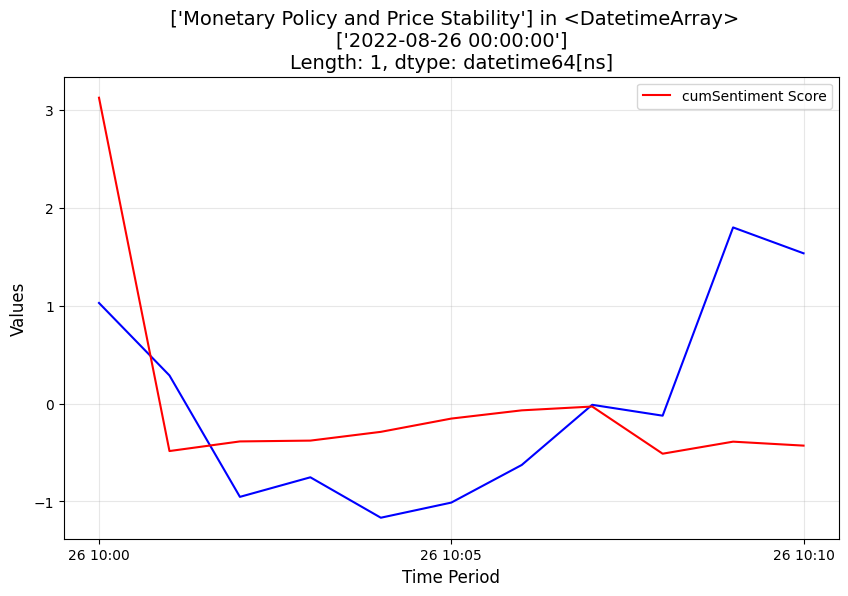

/newsevents/speech/powell20221130a.htm


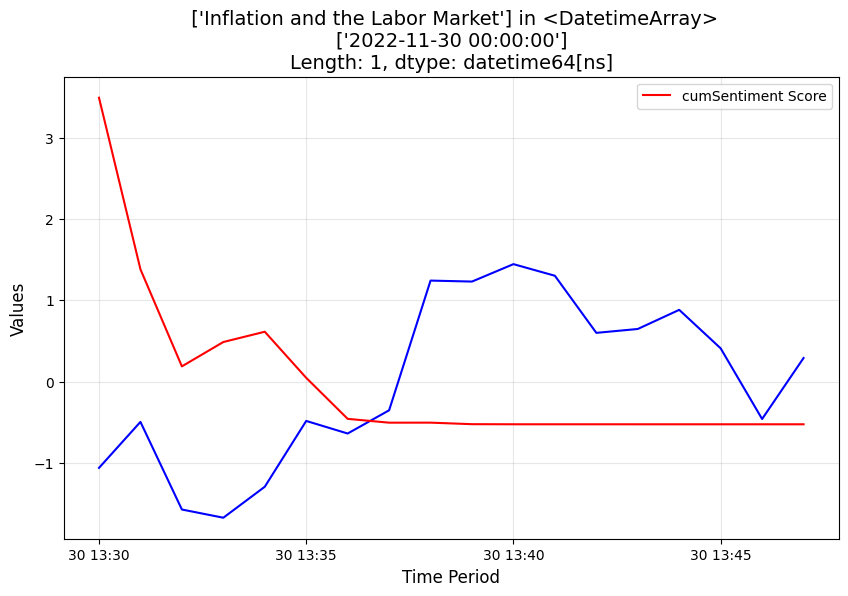

/newsevents/speech/powell20200409a.htm


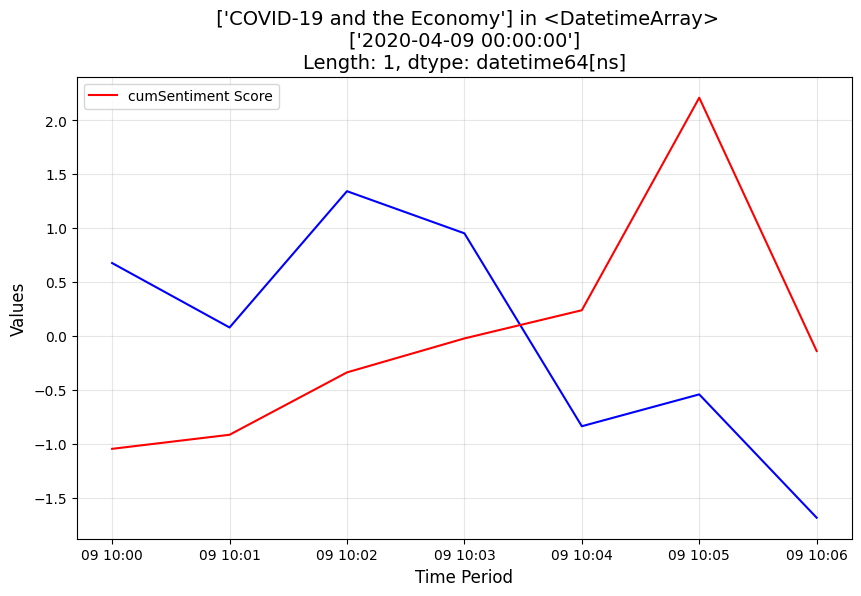

/newsevents/speech/waller20240906a.htm


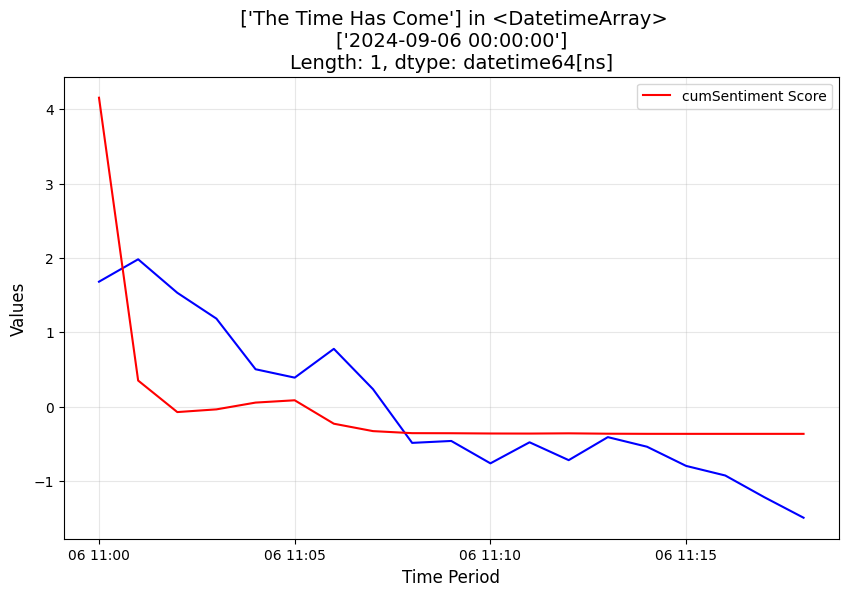

/newsevents/speech/powell20230825a.htm


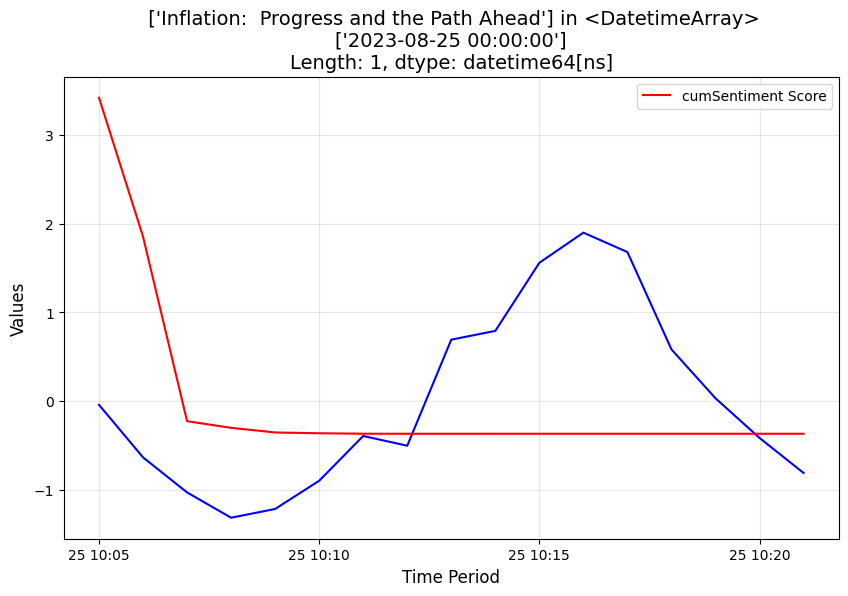

In [18]:
plot_cumret(df_volatility)